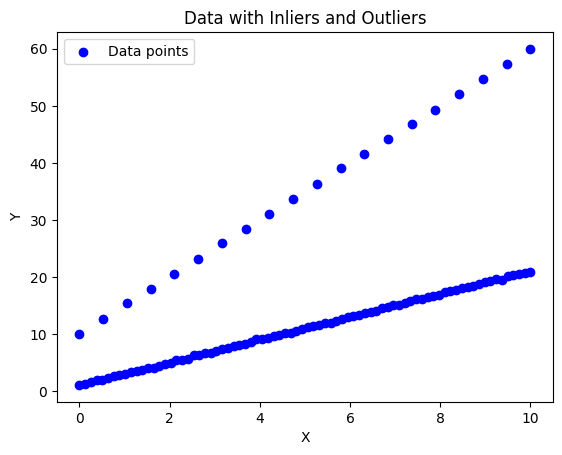

TypeError: object of type 'NoneType' has no len()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some synthetic data with outliers
np.random.seed(42)
num_points = 100
inlier_fraction = 0.8
noise = 0.1

# Generate inliers
x_inliers = np.linspace(0, 10, int(num_points * inlier_fraction))
y_inliers = 2 * x_inliers + 1 + np.random.normal(0, noise, len(x_inliers))

# Generate outliers
x_outliers = np.linspace(0, 10, num_points - len(x_inliers))
y_outliers = 5 * x_outliers + 10 + np.random.normal(0, noise, len(x_outliers))

# Combine inliers and outliers
x_data = np.concatenate([x_inliers, x_outliers])
y_data = np.concatenate([y_inliers, y_outliers])

# Visualize the data
plt.scatter(x_data, y_data, label='Data points', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Data with Inliers and Outliers')
plt.show()

# RANSAC algorithm for line fitting
def fit_line_ransac(data, num_iterations, threshold):
    best_model = None
    best_inliers = None

    for _ in range(num_iterations):
        # Randomly sample two points
        sample_indices = np.random.choice(len(data), size=2, replace=False)
        sample = data[sample_indices]

        # Fit a line to the sampled points
        model = np.polyfit(sample[:, 0], sample[:, 1], deg=1)

        # Calculate distances to the line for all points
        distances = np.abs(np.polyval(model, data[:, 0]) - data[:, 1])

        # Count inliers based on the threshold
        inliers = data[distances < threshold]

        # Update the best model if the current model has more inliers
        if len(inliers) > len(best_inliers):
            best_model = model
            best_inliers = inliers

    return best_model, best_inliers

# Set RANSAC parameters
num_iterations = 100
threshold = 0.5

# Apply RANSAC to fit a line
data = np.column_stack((x_data, y_data))
best_model, best_inliers = fit_line_ransac(data, num_iterations, threshold)

# Visualize the results
plt.scatter(x_data, y_data, label='Data points', color='b')
plt.scatter(best_inliers[:, 0], best_inliers[:, 1], label='Inliers', color='g', marker='x')
plt.plot(x_data, np.polyval(best_model, x_data), label='RANSAC Line', color='r')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('RANSAC Line Fitting')
plt.show()
